# Forest Fires in Brazil

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\hp\\Desktop\\Datasets\\amazon.csv",encoding="ISO-8859-1",parse_dates=['date'])
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [3]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

#### top 5 rows

In [4]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


#### last 5 rows

In [5]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


#### Shape of dataset

In [6]:
print("No. of rows = ",data.shape[0])
print("No. of columns = ",data.shape[1])

No. of rows =  6454
No. of columns =  5


#### Information

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


#### Duplicated values

In [8]:
data.duplicated().any()

True

In [9]:
data = data.drop_duplicates()

In [10]:
data.duplicated().any()

False

#### Null Values in datset

In [11]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

#### Overall statistics

In [12]:
data.describe(include = 'all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


#### Rename month name to english

In [13]:
data['month_new'] = data['month'].map({'Janeiro':'jan',
                                       'Favereiro':'feb',
                                       'Marco':'march',
                                       'Abril':'april',
                                       'Maio':'may',
                                       'Junho':'jun',
                                       'Julho':'july',
                                       'Agosto':'august',
                                       'Setembro':'sep',
                                       'Outubro':'oct',
                                       'Novembro':'nov',
                                       'Dezembro':'dec'})

C:\Users\hp\AppData\Local\Temp\ipykernel_4044\1541705718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_new'] = data['month'].map({'Janeiro':'jan',


In [14]:
data['month_new']

0       jan
1       jan
2       jan
3       jan
4       jan
       ... 
6449    dec
6450    dec
6451    dec
6452    dec
6453    dec
Name: month_new, Length: 6422, dtype: object

#### Total number of fires registered

In [15]:
data.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


In [16]:
data['number'].count()

6422

#### In which month maximum number of forest fires were reported

In [17]:
data.groupby('month_new')['number'].sum().sort_values(ascending = False)

month_new
july      92319.113
oct       88681.579
august    88050.435
nov       85508.054
sep       58578.305
dec       57535.480
jun       55997.675
jan       47681.844
may       34725.363
april     28184.770
Name: number, dtype: float64

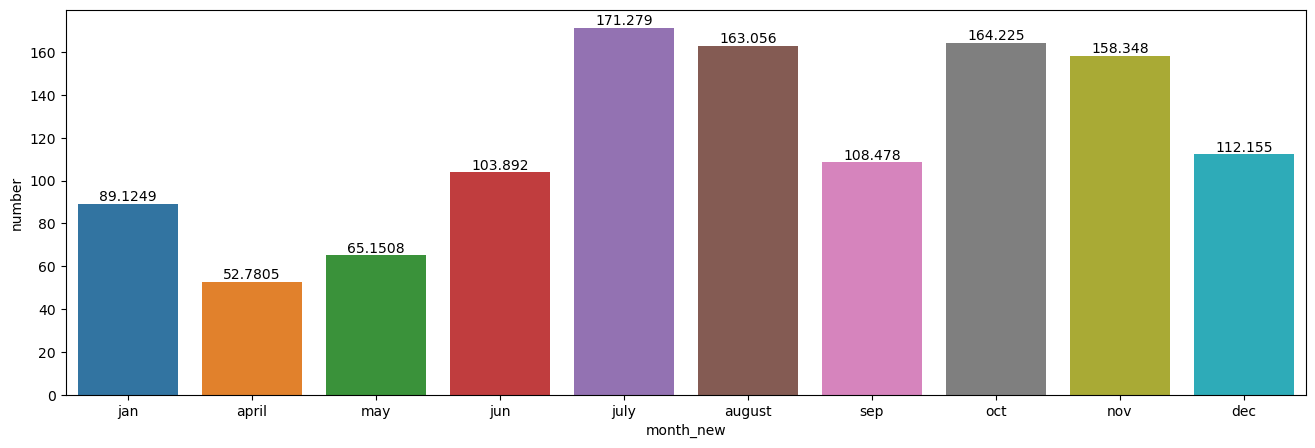

In [18]:
plt.figure(figsize = (16,5))
a = sns.barplot(x = 'month_new',y='number',data=data,errorbar = None,hue = 'month_new',legend=False)
for x in a.containers:
    a.bar_label(x)

#### which state maximum number of forest fires were reported?

In [19]:
data.groupby('state')['number'].sum().sort_values(ascending = False)

state
Mato Grosso         96246.028
Paraiba             52426.918
Sao Paulo           51121.198
Rio                 45094.865
Bahia               44746.226
Piau                37803.747
Goias               37695.520
Minas Gerais        37475.258
Tocantins           33707.885
Amazonas            30650.129
Ceara               30428.063
Maranhao            25129.131
Pará                24512.144
Pernambuco          24498.000
Roraima             24385.074
Santa Catarina      24359.852
Amapa               21831.576
Rondonia            20285.429
Acre                18464.030
Espirito Santo       6546.000
Alagoas              4606.000
Distrito Federal     3561.000
Sergipe              3237.000
Name: number, dtype: float64

#### Total number of fires were reported in Amazonas

In [20]:
data[data['state'] == 'Amazonas']['number'].sum()

30650.129

In [21]:
data[data['state'].str.contains('Amazonas')]['number'].sum()

30650.129

In [22]:
data[data['state'].str.contains('Amazonas')]

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,dec
953,2013,Amazonas,Dezembro,236.0,2013-01-01,dec
954,2014,Amazonas,Dezembro,293.0,2014-01-01,dec
955,2015,Amazonas,Dezembro,565.0,2015-01-01,dec


<Axes: xlabel='year', ylabel='number'>

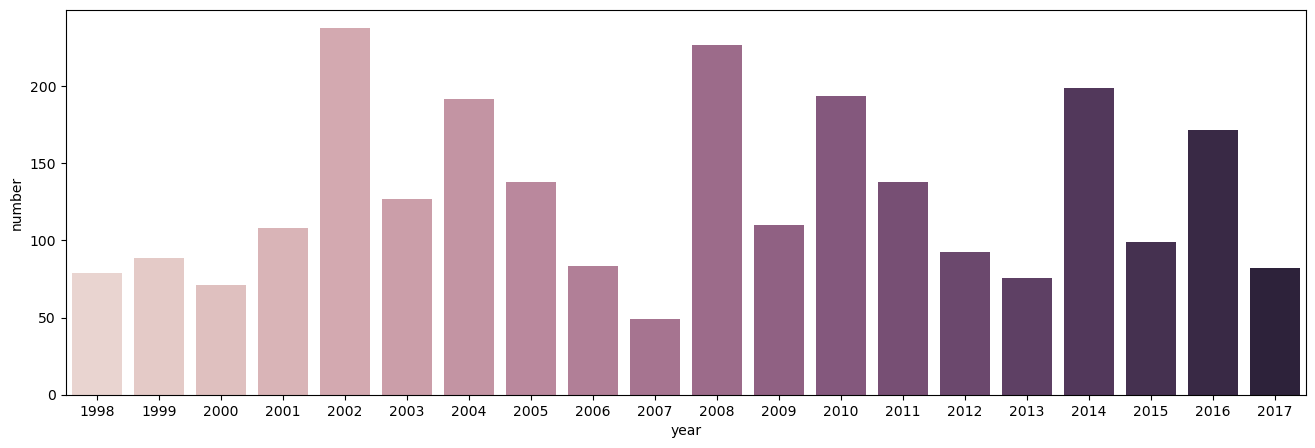

In [23]:
plt.figure(figsize=(16,5))
sns.barplot(x = 'year',y = 'number',data = data[data['state'].str.contains('Amazonas')],hue = 'year',errorbar=None,legend = False)

#### Number of fires reported in Amazonas(Day-wise)

In [24]:
data3 = data[data['state'] == 'Amazonas']

In [33]:
day = data3.groupby(data3['date'].dt.dayofweek)['number'].sum()
import calendar
day.index = [calendar.day_name[x] for x in range(0,7)]
day = day.reset_index()

In [34]:
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


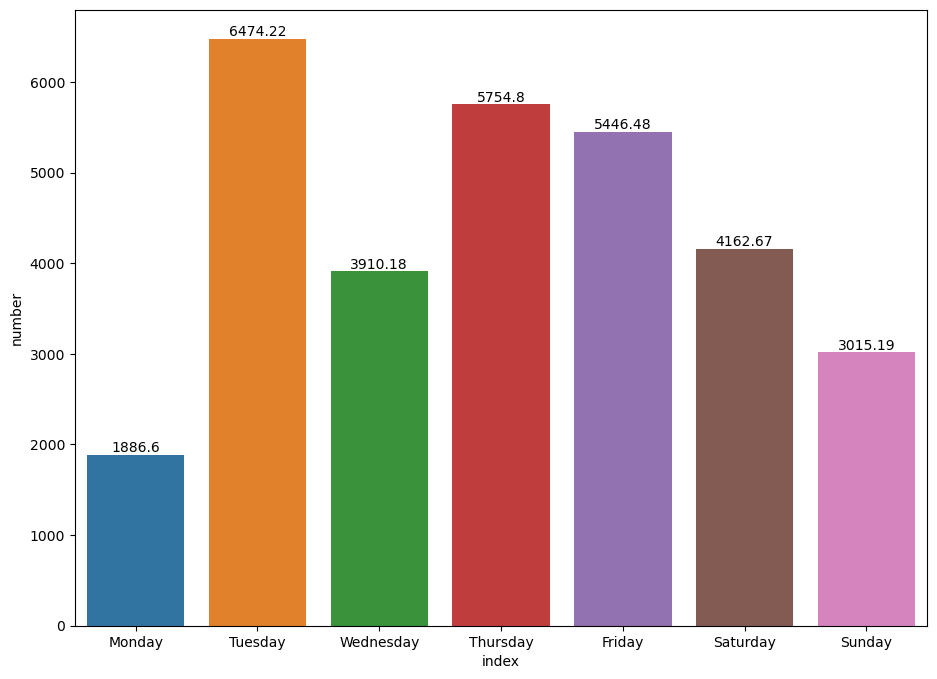

In [43]:
plt.figure(figsize=(11,8))
v = sns.barplot(x = 'index',y = 'number',data = day,hue = 'index')
for x in v.containers:
    v.bar_label(x)

#### Total number of fires were reported in 2015 and visulize data based on each month

In [45]:
fire = data[data['year'] == 2015].groupby('month_new')['number'].sum().reset_index()

<Axes: xlabel='month_new', ylabel='number'>

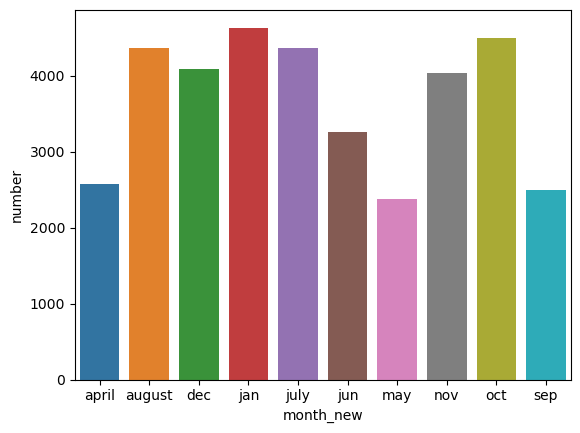

In [46]:
sns.barplot(x = 'month_new',y = 'number',data = fire,hue = 'month_new')

#### Average number of fires were reported from highest to lowest(state-wise)

In [54]:
avg = data.groupby("state")['number'].mean().sort_values(ascending = False).reset_index()

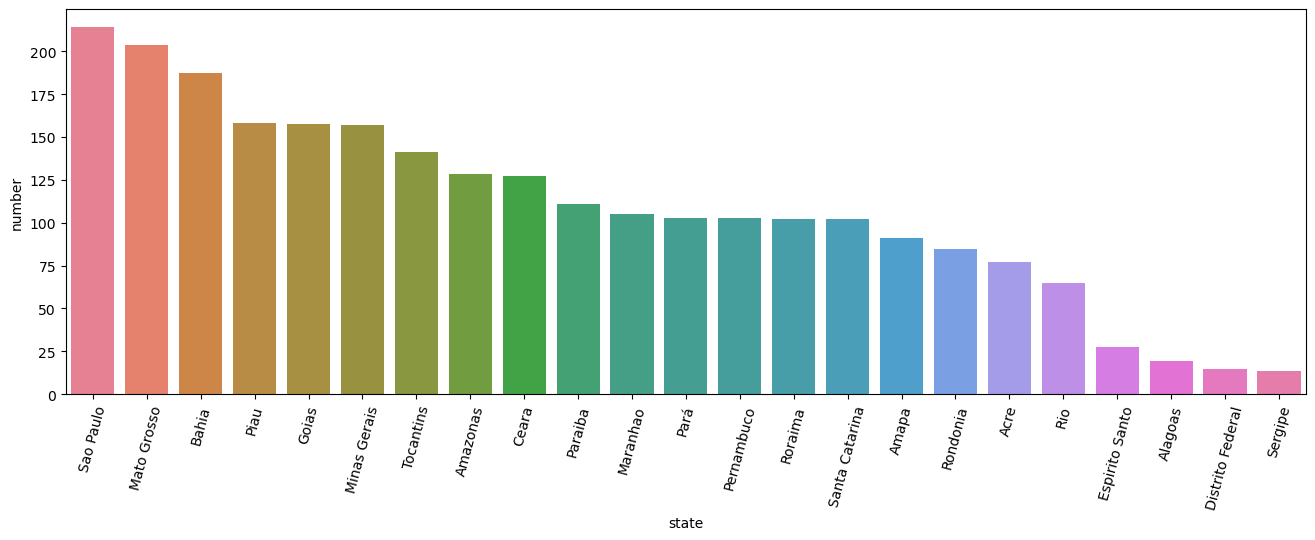

In [69]:
plt.figure(figsize = (16,5))
sns.barplot(x = 'state',y = 'number',data = avg,hue = 'state')
plt.xticks(rotation = 75)
plt.show()

#### Which state have fire in month of december

In [81]:
data[data['month_new'] == 'dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)